In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/number/Number.jpeg


In [3]:
from numpy import unique,argmax
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt

2025-08-09 15:52:29.242896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754754749.515996      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754754749.592218      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_train.size

47040000

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))

In [9]:
X_test=X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [10]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

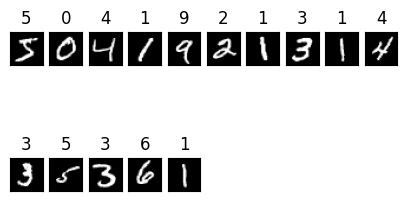

In [11]:
fig=plt.figure(figsize=(5,3))
for i in range(15):
    ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]),cmap='gray')
    ax.set_title(Y_train[i])

In [12]:
img_shape=X_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [13]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-09 15:52:47.288615: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       600,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,702 (2.36 MB)

 Trainable params: 619,702 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

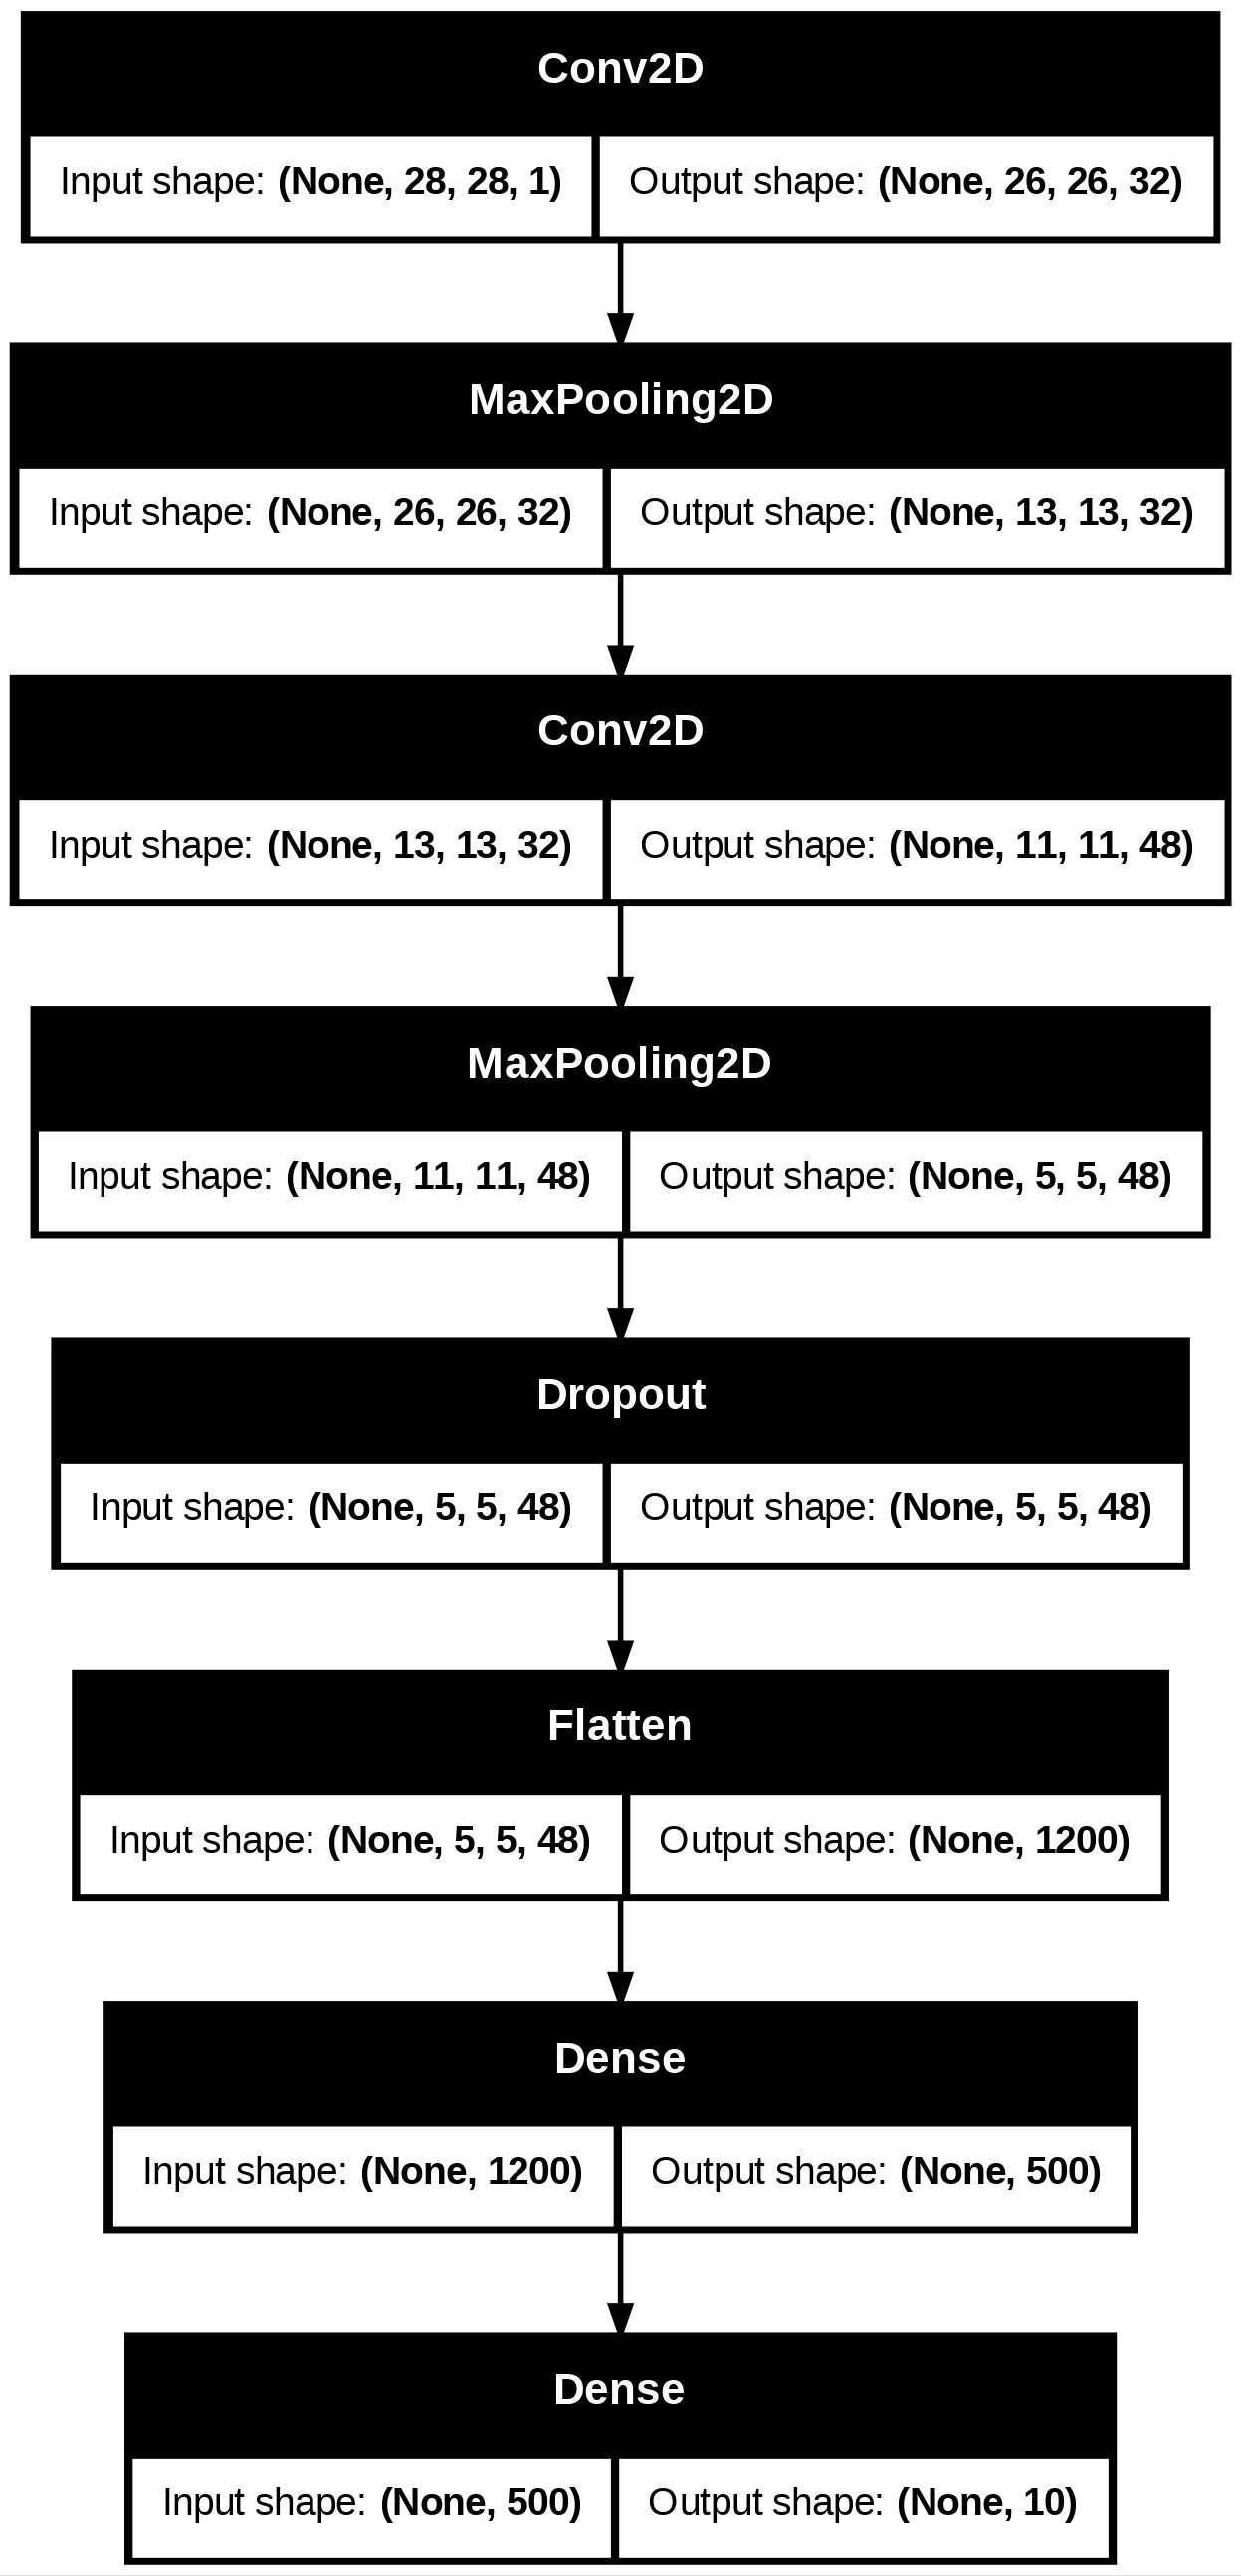

In [15]:
plot_model(model,'model.jpg',show_shapes=True)

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
x=model.fit(X_train,Y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 25s - 59ms/step - accuracy: 0.9268 - loss: 0.2387 - val_accuracy: 0.9830 - val_loss: 0.0588
Epoch 2/10
422/422 - 21s - 49ms/step - accuracy: 0.9747 - loss: 0.0799 - val_accuracy: 0.9890 - val_loss: 0.0415
Epoch 3/10
422/422 - 20s - 47ms/step - accuracy: 0.9818 - loss: 0.0578 - val_accuracy: 0.9907 - val_loss: 0.0330
Epoch 4/10
422/422 - 21s - 49ms/step - accuracy: 0.9844 - loss: 0.0497 - val_accuracy: 0.9898 - val_loss: 0.0308
Epoch 5/10
422/422 - 21s - 49ms/step - accuracy: 0.9872 - loss: 0.0392 - val_accuracy: 0.9927 - val_loss: 0.0285
Epoch 6/10
422/422 - 20s - 47ms/step - accuracy: 0.9881 - loss: 0.0349 - val_accuracy: 0.9912 - val_loss: 0.0340
Epoch 7/10
422/422 - 22s - 51ms/step - accuracy: 0.9895 - loss: 0.0331 - val_accuracy: 0.9922 - val_loss: 0.0294
Epoch 8/10
422/422 - 22s - 52ms/step - accuracy: 0.9906 - loss: 0.0281 - val_accuracy: 0.9910 - val_loss: 0.0290
Epoch 9/10
422/422 - 21s - 49ms/step - accuracy: 0.9914 - loss: 0.0264 - val_accuracy: 0.9923 - 

In [18]:
loss,accuracy=model.evaluate(X_test,Y_test,verbose=0)
print(f'Accuracy:{accuracy*100}')

Accuracy:99.26999807357788


In [19]:
from PIL import Image
from IPython.display import display
image=Image.open('/kaggle/input/number/Number.jpeg')
display(image)

In [20]:
image = image.convert('L') 
image_array=np.array(image).reshape(1,28,28,1)
image_array=image_array/255.0

p=model.predict(image_array)
print('Predicted Number is: {}'.format(argmax(p)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted Number is: 2


In [21]:
model.save("Digit Recognition.h5")